

Extraemos los datos



In [ ]:
pip install pandas

In [ ]:
pip install kaggle

In [ ]:
from google.colab import files
files.upload()  # subir el archivo kaggle.json

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"andrsbentezconcha","key":"1803aefc5414583d80ac97197ddb8271"}'}

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content"  # Ruta donde colocaste el archivo kaggle.json

In [ ]:
import shutil
from kaggle.api.kaggle_api_extended import KaggleApi

# Crear una instancia de la API de Kaggle y autenticar
api = KaggleApi()

# Descargar el conjunto de datos Wine Reviews de Kaggle
dataset_name = "zynicide/wine-reviews"  # Nombre correcto del dataset
download_path = "/content/wine-reviews.zip"  # Ruta de descarga del archivo ZIP

# Descargar el conjunto de datos
api.dataset_download_files(dataset_name, path=download_path, unzip=True)

# Mover los archivos a la carpeta '/content/wine-reviews'
destination_path = "/content/wine-reviews"
if not os.path.exists(destination_path):
    os.makedirs(destination_path)

# Mover los archivos descargados a la carpeta de destino
shutil.move(download_path, destination_path)

print(f"Archivos movidos a: {destination_path}")


Dataset URL: https://www.kaggle.com/datasets/zynicide/wine-reviews


Error: Destination path '/content/wine-reviews/wine-reviews.zip' already exists

In [ ]:
# Ruta al archivo CSV que se descomprimió
csv_file_path = '/content/wine-reviews/winemag-data-130k-v2.csv'

se cargan los dos df

In [ ]:
import pandas as pd

In [ ]:
df1 = pd.read_csv("/content/wine-reviews/wine-reviews.zip/winemag-data_first150k.csv")
df2 = pd.read_csv("/content/wine-reviews/wine-reviews.zip/winemag-data-130k-v2.csv")

# 1. Exploración y Limpieza de Datos (EDA & ETL)

# con df1: winemag-data_first150k.csv

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   150930 non-null  int64  
 1   country      150925 non-null  object 
 2   description  150930 non-null  object 
 3   designation  105195 non-null  object 
 4   points       150930 non-null  int64  
 5   price        137235 non-null  float64
 6   province     150925 non-null  object 
 7   region_1     125870 non-null  object 
 8   region_2     60953 non-null   object 
 9   variety      150930 non-null  object 
 10  winery       150930 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.7+ MB


**Breve descripción de las variables**

**country**: El país de origen del vino.

**description**: Una descripción del vino, donde se detallan las características como sabor, aroma y notas de cata.

**designation**: Nombre o designación específica del vino, a menudo relacionado con la bodega o la subregión.

**points**: La puntuación otorgada al vino por los catadores, generalmente en una escala de 1 a 100.

**price**: El precio del vino, en la moneda local del país de origen.

**province**: La provincia o estado dentro del país donde se produce el vino.

**region_1**: Una región más específica dentro de la provincia, indicando la zona exacta de producción.

**region_2**: Una subregión aún más específica dentro de region_1, aunque a menudo está vacía.

**variety**: El tipo de uva (variedad) utilizada para el vino.

**winery**: El nombre de la bodega o productor del vino.

In [ ]:
# Mostrar las primeras filas
df1.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [ ]:
df2.shape

(129971, 14)

In [ ]:
#  valores faltantes
df1.isna().sum()

,0
Unnamed: 0,0
country,5
description,0
designation,45735
points,0
price,13695
province,5
region_1,25060
region_2,89977
variety,0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

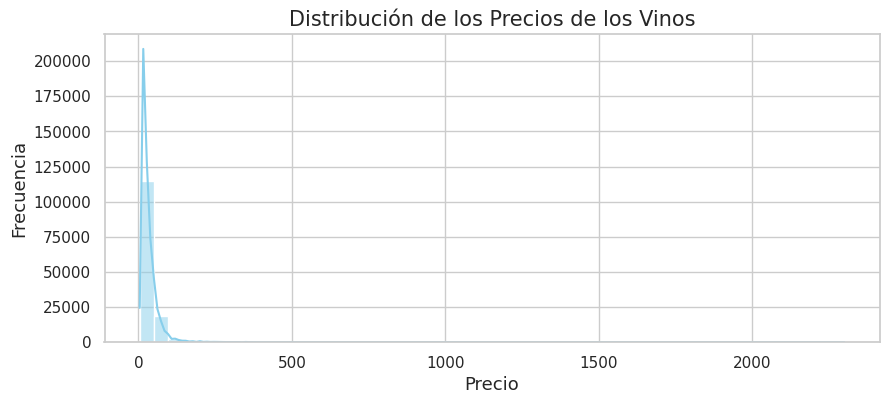

In [ ]:
# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Crear el gráfico de distribución para la columna 'price'
plt.figure(figsize=(10, 4))
sns.histplot(df1['price'], bins=50, kde=True, color='skyblue')

# Título y etiquetas
plt.title('Distribución de los Precios de los Vinos', fontsize=15)
plt.xlabel('Precio', fontsize=13)
plt.ylabel('Frecuencia', fontsize=13)

# Mostrar el gráfico
plt.show()


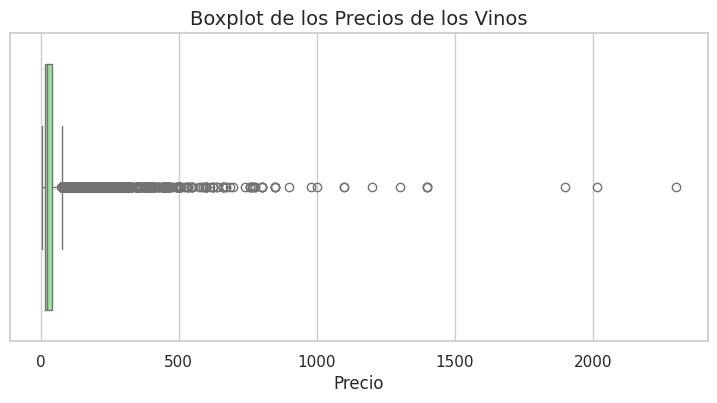

In [ ]:
# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Crear el boxplot para la columna 'price'
plt.figure(figsize=(9, 4))
sns.boxplot(x=df1['price'], color='lightgreen')

# Título y etiquetas
plt.title('Boxplot de los Precios de los Vinos', fontsize=14)
plt.xlabel('Precio', fontsize=12)

# Mostrar el gráfico
plt.show()

price 13695 son nulos y los reemplazamos por la mediana

In [ ]:
df1['price'].fillna(df1['price'].median(), inplace=True)

<ipython-input-12-d04b3684edfc>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['price'].fillna(df1['price'].median(), inplace=True)


imputando por mediana el grafico no tiene mayor cambio

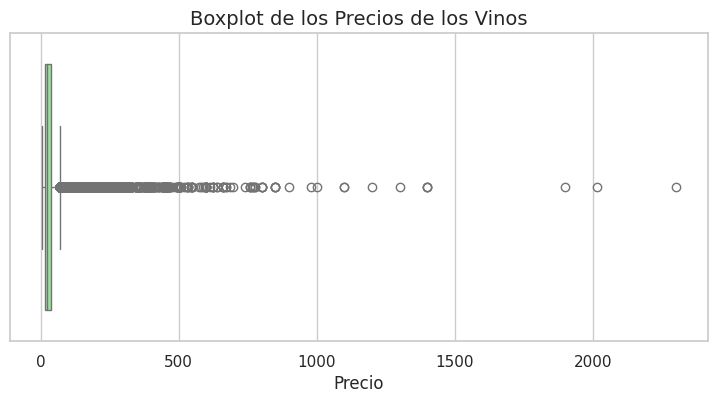

In [ ]:
# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Crear el boxplot para la columna 'price'
plt.figure(figsize=(9, 4))
sns.boxplot(x=df1['price'], color='lightgreen')

# Título y etiquetas
plt.title('Boxplot de los Precios de los Vinos', fontsize=14)
plt.xlabel('Precio', fontsize=12)

# Mostrar el gráfico
plt.show()

eliminar paises y provincias faltantes, son 5 nulos asi es que es una buena decisión

In [ ]:
# Eliminar las filas con valores nulos en 'country' y 'province'
df1 = df1.dropna(subset=['country', 'province'])

el resto de los nulos son: designation: 45735, region_1: 25060, region_2: 89977 (muchos nulos, dificlmente se utilicen más adelante, de todas formas se mantienen sin alterar)

como tenemos la variable country imputada con pocos nulos, se considera que es totalmente operacionalizable, mientras que designation, region_1 y region_2, aun no sabemos si las ocuparemos más adelante. decisión: se mantienen en esta etapa hasta nuevo aviso.  

verificar duplicados

In [ ]:
# Verificar si existen filas duplicadas
duplicados = df1[df1.duplicated()]

# Mostrar los primeros duplicados (si los hay)
print(duplicados.head())

Empty DataFrame
Columns: [Unnamed: 0, country, description, designation, points, price, province, region_1, region_2, variety, winery]
Index: []


In [ ]:
# Contar cuántas filas duplicadas hay
num_duplicados = df1.duplicated().sum()
print(f'Número de duplicados: {num_duplicados}')

Número de duplicados: 0


In [ ]:
#  valores faltantes
df1.isna().sum()

,0
Unnamed: 0,0
country,0
description,0
designation,45735
points,0
price,0
province,0
region_1,25055
region_2,89972
variety,0


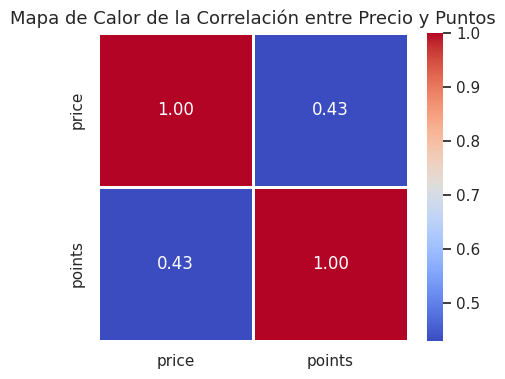

In [ ]:
# Seleccionar las columnas de interés
correlation_data = df1[['price', 'points']]

# Calcular la matriz de correlación
correlation_matrix = correlation_data.corr()

# Crear el mapa de calor de la correlación
plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1)

# Título
plt.title('Mapa de Calor de la Correlación entre Precio y Puntos', fontsize=13)

# Mostrar el gráfico
plt.show()


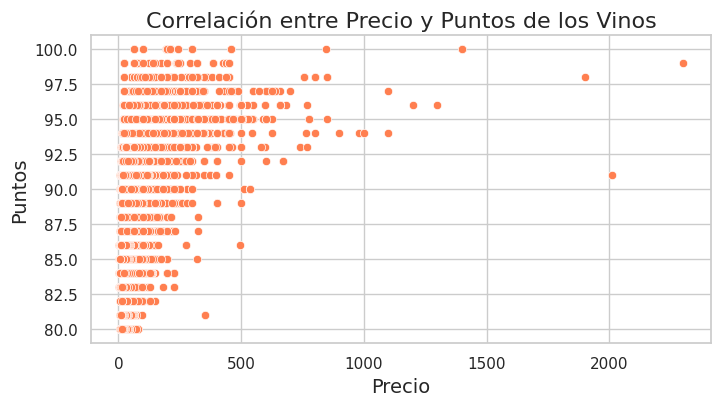

In [ ]:
# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Crear el gráfico de dispersión para correlación entre 'price' y 'points'
plt.figure(figsize=(8, 4))
sns.scatterplot(x=df1['price'], y=df1['points'], color='coral')

# Título y etiquetas
plt.title('Correlación entre Precio y Puntos de los Vinos', fontsize=16)
plt.xlabel('Precio', fontsize=14)
plt.ylabel('Puntos', fontsize=14)

# Mostrar el gráfico
plt.show()


hay una alta concentracion de buenos puntajes entre los vinos que son economicos hasta los 500 USD. son muy pocos los vinos que superan los 1000 USD y que por lo demás tienen de más de 90

# con df2: winemag-data-130k-v2.csv

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


"taster_name", "taster_twitter_handle" y "title" son variables adicionales (object) que tiene esta df2 en comparación a df1.

**Breve descripción de las variables adicionales**

"taster_name": nombre del catador o experto en vinos que realizó la evaluación o puntuación del vino.

"taster_twitter_handle": el nombre de usuario que lo identifica en twitter. permite asociar a los catadores con sus cuentas en Twitter.

"title": nombre del vino o etiqueta que ha sido evaluado por un catador

datos faltantes

In [ ]:
#  valores faltantes
df2.isna().sum()

,0
Unnamed: 0,0
country,63
description,0
designation,37465
points,0
price,8996
province,63
region_1,21247
region_2,79460
taster_name,26244


imputados faltanes

In [ ]:
# Eliminar las filas con valores nulos en 'country' y 'province'
df2 = df2.dropna(subset=['country', 'province'])

In [ ]:
# Eliminar las filas con valores nulos en variety
df2 = df2.dropna(subset=['variety'])

price 8996 faltantes , lo reemplzamos por la mediana

In [ ]:
df2['price'].fillna(df2['price'].median(), inplace=True)

<ipython-input-19-129ccf0a5d08>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['price'].fillna(df2['price'].median(), inplace=True)


In [ ]:
#  valores faltantes
df2.isna().sum()

,0
Unnamed: 0,0
country,0
description,0
designation,37453
points,0
price,0
province,0
region_1,21183
region_2,79396
taster_name,26243


por el momento nos quedamos con los faltantes de "region_1", "region_2", "taster_name", "taster_twitter_handle", "designation". No sabemos aun si son variables que necesitaremos modelar más adelante así es que las dejamos con los faltantes.

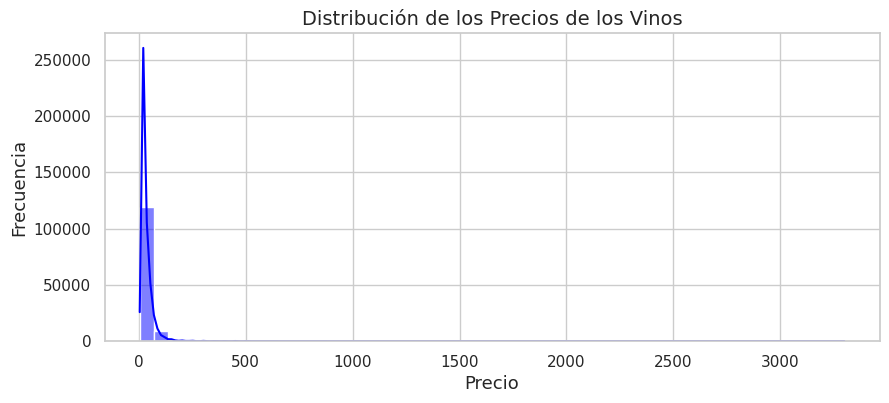

In [ ]:
# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Crear el gráfico de distribución para la columna 'price'
plt.figure(figsize=(10, 4))
sns.histplot(df2['price'], bins=50, kde=True, color='blue')

# Título y etiquetas
plt.title('Distribución de los Precios de los Vinos', fontsize=14)
plt.xlabel('Precio', fontsize=13)
plt.ylabel('Frecuencia', fontsize=13)

# Mostrar el gráfico
plt.show()

minimos y maximos

In [ ]:
# Obtener el precio mínimo y máximo
min_price = df2['price'].min()
max_price = df2['price'].max()

# Imprimir los valores
print(f'Precio mínimo: {min_price}')
print(f'Precio máximo: {max_price}')

Precio mínimo: 4.0
Precio máximo: 3300.0


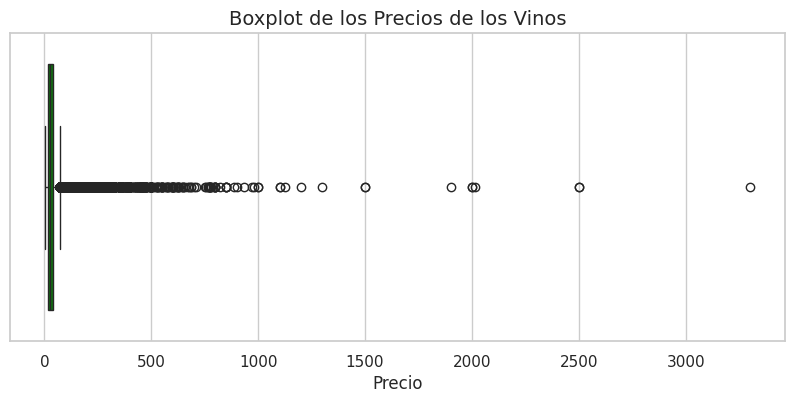

In [ ]:
# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Crear el boxplot para la columna 'price'
plt.figure(figsize=(10, 4))
sns.boxplot(x=df2['price'], color='green')

# Título y etiquetas
plt.title('Boxplot de los Precios de los Vinos', fontsize=14)
plt.xlabel('Precio', fontsize=12)

# Mostrar el gráfico
plt.show()

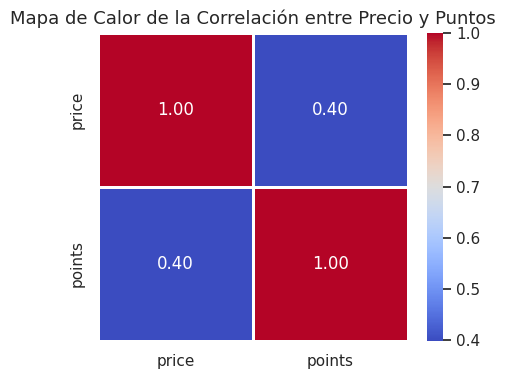

In [ ]:
# Seleccionar las columnas de interés
correlation_data = df2[['price', 'points']]

# Calcular la matriz de correlación
correlation_matrix = correlation_data.corr()

# Crear el mapa de calor de la correlación
plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1)

# Título
plt.title('Mapa de Calor de la Correlación entre Precio y Puntos', fontsize=13)

# Mostrar el gráfico
plt.show()

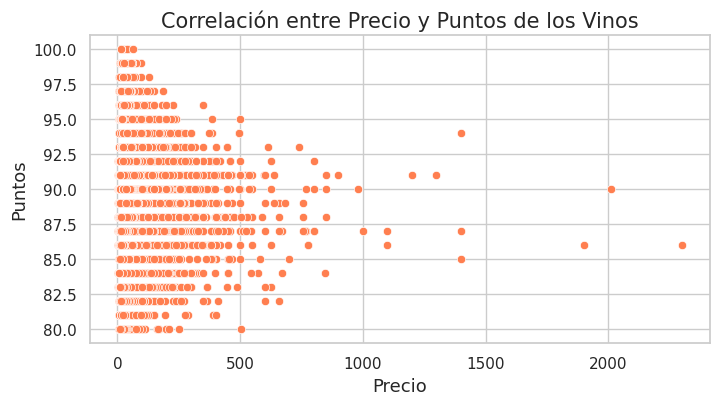

In [ ]:
# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Crear el gráfico de dispersión para correlación entre 'price' y 'points'
plt.figure(figsize=(8, 4))
sns.scatterplot(x=df1['price'], y=df2['points'], color='coral')

# Título y etiquetas
plt.title('Correlación entre Precio y Puntos de los Vinos', fontsize=15)
plt.xlabel('Precio', fontsize=13)
plt.ylabel('Puntos', fontsize=13)

# Mostrar el gráfico
plt.show()


no por mas caro tiene mas puntos. los datos se concentran entre los mas economicos hasta casi los 500 USD y con puntajes entre los 85 y 92.5 por los catadores. son muy pocos los vinos que superan los 1000 USD y estos, no se concentran en los mejores puntajes.

# 2. Análisis de Precios y Factores de Calidad

Analizar la relación entre el precio y la puntuación de los
vinos.


In [ ]:
correlation = df1[['price', 'points']].corr()
print(correlation)

           price    points
price   1.000000  0.429703
points  0.429703  1.000000


In [ ]:
correlation = df2[['price', 'points']].corr()
print(correlation)


           price    points
price   1.000000  0.399266
points  0.399266  1.000000


correlación entre el precio y la puntuación es moderadamente positiva. Esto significa que, en general, a medida que aumenta el precio de un vino, también tiende a aumentar su puntuación. pero como vimos anteriormente *el precio no determina una alta puntuacion de los catadores*, de hehco lo contrario, los vinos más economicos o que llegan a un tope de 500 USD son los mejores calificados por los catadores.

Identificar si existen regiones o variedades de uva con
mejor relación calidad-precio.


Calcular la relación calidad-precio

In [ ]:
# Crear una nueva columna para la relación calidad-precio
df2['quality_price_ratio'] = df2['points'] / df2['price']

In [ ]:
df2["quality_price_ratio"].unique()

array([3.48      , 5.8       , 6.21428571, ..., 0.69117647, 0.56287425,
       0.39574468])

In [ ]:
# Obtener el valor máximo y mínimo de 'quality_price_ratio'
max_quality_price = df2['quality_price_ratio'].max()
min_quality_price = df2['quality_price_ratio'].min()

print("Valor máximo de la relación calidad-precio:", max_quality_price)
print("Valor mínimo de la relación calidad-precio:", min_quality_price)

Valor máximo de la relación calidad-precio: 21.5
Valor mínimo de la relación calidad-precio: 0.02666666666666667


Valores altos: Buena calidad a bajo precio, una opción atractiva para los consumidores.

Valores bajos: Alta calidad pero caro, o vino de baja calidad a alto precio, lo que podría ser menos atractivo.

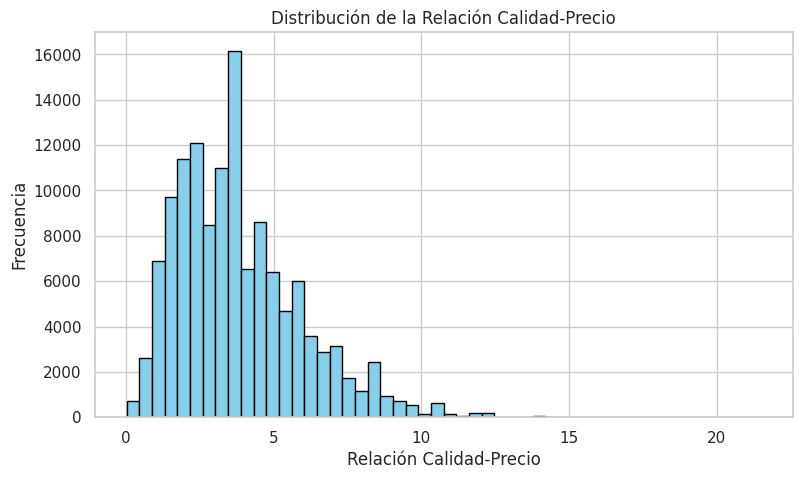

In [ ]:
# Graficar el histograma de la relación calidad-precio
plt.figure(figsize=(9, 5))
plt.hist(df2['quality_price_ratio'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribución de la Relación Calidad-Precio')
plt.xlabel('Relación Calidad-Precio')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

Agrupar por región y variedad

dado que regiones tienen muchos valores perdidos utilicé paises

PAISES

In [ ]:
# Agrupar por región y calcular la media de la relación calidad-precio
region_quality_price = df2.groupby('country')['quality_price_ratio'].mean().sort_values(ascending=False)

# Mostrar las mejores regiones por relación calidad-precio
print(region_quality_price.head())


country
Ukraine                   9.671551
Romania                   8.873497
India                     7.129465
Bulgaria                  7.006666
Bosnia and Herzegovina    6.935897
Name: quality_price_ratio, dtype: float64


también se hizo el ejercicio de hacerlo con region no imputada y region imputada para verificar si podía ser presentable

REGIONES (Region_1)

In [ ]:
# Agrupar por región y calcular la media de la relación calidad-precio
region_quality_price = df2.groupby('region_1')['quality_price_ratio'].mean().sort_values(ascending=False)

# Mostrar las mejores regiones por relación calidad-precio
print(region_quality_price.head())

region_1
Grave del Friuli                           12.000000
Australia-New Zealand                      10.375000
Tierra de Castilla                         10.210006
Vino de la Tierra Contraviesa Alpujarra     9.666667
Côtes du Frontonnais                        9.444444
Name: quality_price_ratio, dtype: float64


REGIONES (Region_1 imputada)

In [ ]:
# Eliminar las filas con datos faltantes en la columna 'region_1'
df2= df2.dropna(subset=['region_1'])

In [ ]:
# Agrupar por región y calcular la media de la relación calidad-precio
region_quality_price = df2.groupby('region_1')['quality_price_ratio'].mean().sort_values(ascending=False)

# Mostrar las mejores regiones por relación calidad-precio
print(region_quality_price.head())

region_1
Grave del Friuli                           12.000000
Australia-New Zealand                      10.375000
Tierra de Castilla                         10.210006
Vino de la Tierra Contraviesa Alpujarra     9.666667
Côtes du Frontonnais                        9.444444
Name: quality_price_ratio, dtype: float64


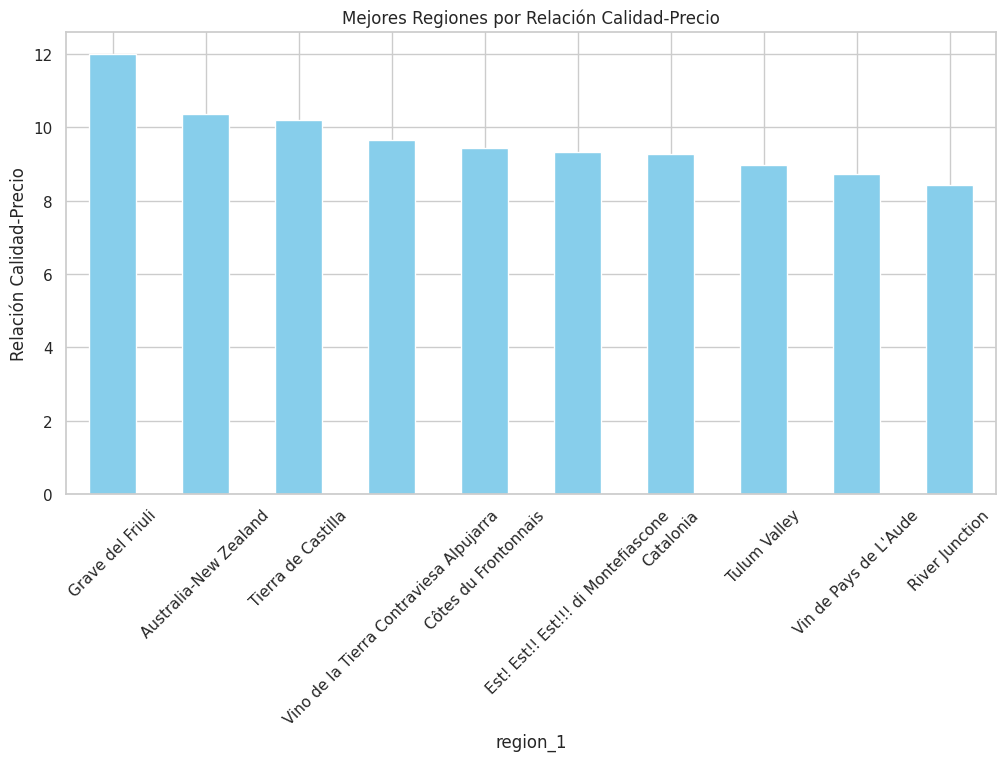

In [ ]:
# Gráfico de barras de las mejores regiones por relación calidad-precio
plt.figure(figsize=(12, 6))
region_quality_price.head(10).plot(kind='bar', color='skyblue')
plt.title('Mejores Regiones por Relación Calidad-Precio')
plt.xlabel('region_1')
plt.ylabel('Relación Calidad-Precio')
plt.xticks(rotation=45)
plt.show()


VARIEDAD

El tipo de uva (variedad) utilizada para el vino

In [ ]:
# Agrupar por variedad y calcular la media de la relación calidad-precio
variety_quality_price = df2.groupby('variety')['quality_price_ratio'].mean().sort_values(ascending=False)

# Mostrar las mejores variedades por relación calidad-precio
print(variety_quality_price.head())


variety
Macabeo-Moscatel              10.625000
Shiraz-Tempranillo             9.914286
Johannisberg Riesling          9.793386
Tinto Velasco                  9.444444
Merseguera-Sauvignon Blanc     9.444444
Name: quality_price_ratio, dtype: float64


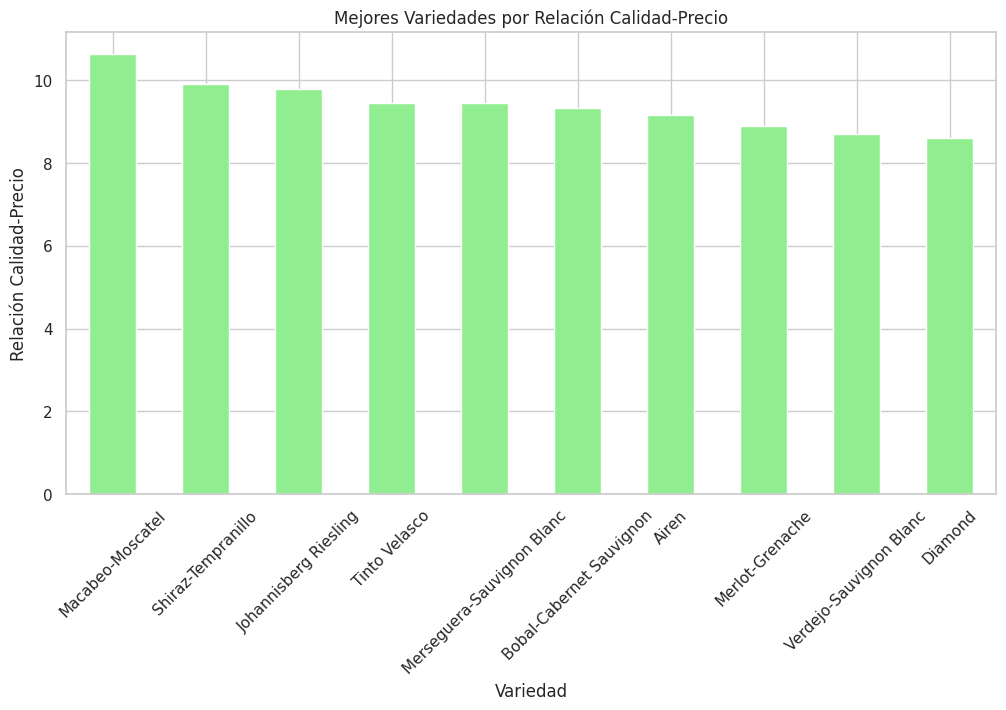

In [ ]:
# Gráfico de barras de las mejores variedades por relación calidad-precio
plt.figure(figsize=(12, 6))
variety_quality_price.head(10).plot(kind='bar', color='lightgreen')
plt.title('Mejores Variedades por Relación Calidad-Precio')
plt.xlabel('Variedad')
plt.ylabel('Relación Calidad-Precio')
plt.xticks(rotation=45)
plt.show()


In [ ]:
import pandas as pd

# Calcular percentiles para los precios
q1 = df2['price'].quantile(0.25)
q2 = df2['price'].quantile(0.50)  # Mediana
q3 = df2['price'].quantile(0.75)

# Recodificar los precios en categorías
def categorize_price(price):
    if price <= q1:
        return 'Bajo'
    elif price <= q2:
        return 'Medio'
    elif price <= q3:
        return 'Alto'
    else:
        return 'Muy alto'

# Aplicar la recodificación
df2['price_category'] = df2['price'].apply(categorize_price)

# Ver el resultado
print(df2[['price', 'price_category']].head())

   price price_category
0   25.0          Medio
2   14.0           Bajo
3   13.0           Bajo
4   65.0       Muy alto
5   15.0           Bajo


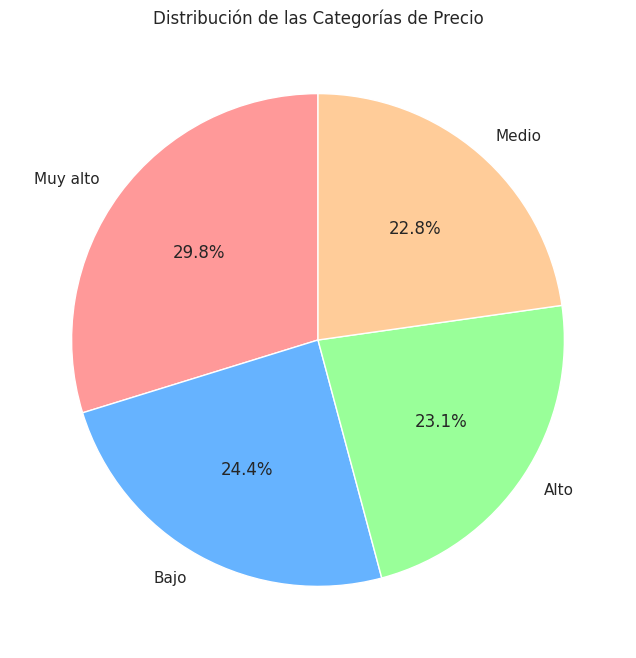

In [ ]:
# Contar la cantidad de vinos en cada categoría de precio
price_category_counts = df2['price_category'].value_counts()

# Crear un gráfico de torta
plt.figure(figsize=(8, 8))
price_category_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])  # Colores personalizados
plt.title('Distribución de las Categorías de Precio')
plt.ylabel('')  # Eliminar el label de y-axis
plt.show()

Aplicar técnicas de regresión para predecir el precio de un
vino según sus características.


MODELO DE REGRESION LINEAL PARA EL PRECIO

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Obtener el valor máximo y mínimo de 'quality_price_ratio'
max_quality_price = df2['price'].max()
min_quality_price = df2['price'].min()

print("Valor máximo de price:", max_quality_price)
print("Valor mínimo de price:", min_quality_price)

Valor máximo de price: 3300.0
Valor mínimo de price: 4.0


genrar el modelo de regresión: su variable dependiente y variables independientes

In [ ]:
# Seleccionar características para el modelo
features = ['points', 'country', 'region_1', 'variety', 'quality_price_ratio']
target = 'price'

# Definir las variables independientes (X) y la dependiente (y)
X = df2[features]
y = df2[target]

ya habiamos tratado los nulos imputando para region_1 , country, point y variety

trasformamos a binario las categoricas

In [ ]:
X = pd.get_dummies(X, columns=['country', 'region_1', 'variety'], drop_first=True)

escalar variable point y nueva variable ratio calidad/precio

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X[['points','quality_price_ratio']] = scaler.fit_transform(X[['points', 'quality_price_ratio']])

División de los datos en conjunto de entrenamiento y prueba

In [ ]:
# Dividir los datos en 80% para entrenamiento y 20% para prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Entrenamiento del modelo

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

LinearRegression()

 Evaluar el modelo

In [ ]:
# Hacer predicciones con el conjunto de prueba
y_pred = model.predict(X_test)

NOTA PARA EVALUAR REGRESION LINEAL:
En el modelo de regresión lineal no se usan métricas de clasificación como precisión (accuracy), classification_report, etc (r accuracy_score y classification_report).

Para evaluar un modelo de regresión lineal, utilizamos el Error Cuadrático Medio (MSE) o el Coeficiente de Determinación R².

Regresion lineal es para predicciones numéricas continuas.

Regresión logística es para clasificar observaciones en categorías.

In [ ]:
# Evaluar el modelo usando el error cuadrático medio (MSE) o R²
from sklearn.metrics import mean_squared_error, r2_score

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calcular el R² (coeficiente de determinación)
r2 = r2_score(y_test, y_pred)

print(f'Error cuadrático medio (MSE): {mse}')
print(f'R²: {r2}')


Error cuadrático medio (MSE): 809.0295956945195
R²: 0.42049617415637996


con independientes features = ['points', 'country', 'region_1', 'variety', 'quality_price_ratio']

Error cuadrático medio (MSE): 809.0295956945195
R²: 0.42049617415637996





con una independiente features = ['points']

Error cuadrático medio (MSE): 1161.0904372706812
R²: 0.16831676600015943


con una independiente features = ['region_1']

Error cuadrático medio (MSE): 1072.324048244855
R²: 0.2318996835108963

con una independiente features = ['region_1', 'variety']

Error cuadrático medio (MSE): 1039.5311876347828
R²: 0.2553890444502567

CONCLUSIÓN REGRESIÓN LINEAL PRECIO:

Error Cuadrático Medio (MSE): 809.02....mide la diferencia promedio entre las predicciones del modelo y los valores reales (con el error elevado al cuadrado).

MSE: 809.02 podría ser considerado relativamente alto, dependiendo de la magnitud de los precios de los vinos en tu conjunto de datos. Si los precios de los vinos son muy altos (por ejemplo, de miles de dólares), un MSE de 953 podría ser aceptable, pero si los precios son bajos, podría significar que el modelo está cometiendo errores significativos.




R² de 0.42 indica que el modelo está explicando aproximadamente el 42% de la variabilidad en los precios de los vinos. El modelo no está capturando bien la relación entre las características y el precio del vino (al igual que correlación)

poca variabilidad significa que no está logrando predecir con precisión o capturar las diferencias que existen en los precios de los vinos en función de las características

En los gráficos que has generado, como el scatterplot entre "precio" y "puntos", podemos ver que no necesariamente los vinos más caros tienen los mejores puntajes. Muchos vinos de bajo precio también tienen buenas puntuaciones. Esto sugiere que el precio no es un factor determinante exclusivo de la calidad (puntajes), y otras variables pueden estar influyendo, como la región, la variedad de uva o incluso el marketing de la bodega. La baja correlación entre precio y puntos también contribuye a la falta de explicación clara del modelo.


Conclusión

El modelo probablemente no esté capturando todos los factores que influyen en los precios, y es por eso que no puede explicar bien la variabilidad en los precios. La baja correlación entre precio y puntos, junto con la presencia de otros factores no observados, refuerzan esta idea. Deberías explorar la inclusión de más variables o considerar modelos más complejos (como técnicas de machine learning) que puedan manejar de manera más efectiva la complejidad de los datos.